In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(sklearn.__version__)
import xgboost
print(xgboost.__version__)


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import RepeatedKFold

import os
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot_ng as pydot
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

import tensorflow as tf

1.0.2
1.6.1


In [2]:
phq = pd.read_csv('phq.csv')
phq.drop(phq.columns[phq.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
phq.head()

,PHQ88_A,PHQ87_A,PHQ86_A,PHQ85_A,PHQ84_A,PHQ83_A,PHQ82_A,PHQ81_A,DEPEV_A
0,1,1,1,1,1,1,1,1,2
1,1,2,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1,1,2
3,1,1,1,1,1,2,1,1,2
4,1,4,2,2,3,2,3,4,1


Random Forest Classifier

In [3]:
phq = phq.sample(frac=1)

train = phq.sample(frac=0.8)
print('Train:' + str(train.shape))

test = phq.sample(frac=0.2)
print('Test:' + str(test.shape))

Train:(25567, 9)
Test:(6392, 9)


In [7]:
X,y = train.drop(['DEPEV_A'], axis=1), train[['DEPEV_A']].to_numpy()
X_test, y_test = test.drop(['DEPEV_A'], axis=1), test[['DEPEV_A']].to_numpy()


In [8]:
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, np.ravel(y), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.850 (0.006)


In [9]:
# test and predict
model.fit(X, np.ravel(y))

yhat = model.predict(X_test)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [10]:
model.score(X_test, y_test)

0.8951814768460575

In [11]:
full_columns = []
for (columnName, columnData) in X.iteritems(): # iterate through column names
        full_columns.append(columnName)
label = 'DEPEV_A'

[Text(0.5546998544369104, 0.9782608695652174, 'PHQ86_A <= 1.5\ngini = 0.284\nsamples = 16203\nvalue = [4368, 21183, 16]\nclass = E'),
 Text(0.23719568101415095, 0.9347826086956522, 'PHQ81_A <= 1.5\ngini = 0.202\nsamples = 13709\nvalue = [2452, 19125, 7]\nclass = E'),
 Text(0.12090507075471699, 0.8913043478260869, 'PHQ85_A <= 1.5\ngini = 0.158\nsamples = 12221\nvalue = [1661, 17612, 5]\nclass = E'),
 Text(0.06264150943396227, 0.8478260869565217, 'PHQ82_A <= 1.5\ngini = 0.143\nsamples = 11143\nvalue = [1360, 16221, 4]\nclass = E'),
 Text(0.027358490566037737, 0.8043478260869565, 'PHQ84_A <= 1.5\ngini = 0.122\nsamples = 10691\nvalue = [1101, 15768, 4]\nclass = E'),
 Text(0.011169811320754716, 0.7608695652173914, 'PHQ88_A <= 1.5\ngini = 0.094\nsamples = 8120\nvalue = [632, 12154, 1]\nclass = E'),
 Text(0.005283018867924529, 0.717391304347826, 'PHQ87_A <= 1.5\ngini = 0.093\nsamples = 8067\nvalue = [623, 12088, 1]\nclass = E'),
 Text(0.0018113207547169811, 0.6739130434782609, 'PHQ83_A <= 1.5

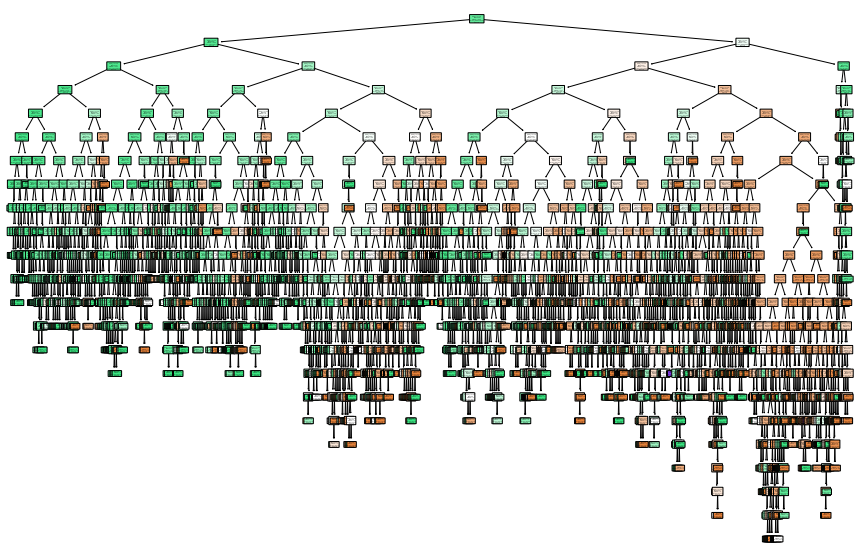

In [13]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=full_columns,
          class_names=label, 
          filled=True, impurity=True, 
          rounded=True)

In [14]:
fig.savefig('phq_tree.png')

Naive Bayes

In [7]:
X2 = phq.drop(['DEPEV_A'], axis=1)
y2 = phq['DEPEV_A']

In [8]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=1)
gnb = GaussianNB()
gnb.fit(X2_train, y2_train)
y2_pred = gnb.predict(X2_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y2_test, y2_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 83.729662077597


Xgboost

In [11]:
model = xgboost.XGBRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 0.210 (0.007)


In [ ]:
model.score(X, y)

Keras

In [15]:
train3 = phq.sample(frac=0.8)
print('Train:' + str(train3.shape))

validate3 = phq.sample(frac=0.1)
print('Validate:' + str(validate3.shape))

test3 = phq.sample(frac=0.1)
print('Test:' + str(test3.shape))

label_column = 'DEPEV_A'
label = phq[['DEPEV_A']].to_numpy()

Train:(25567, 9)
Validate:(3196, 9)
Test:(3196, 9)


In [16]:
x3_train = train3.drop(['DEPEV_A'], axis=1)
x3_train = np.asarray(x3_train).astype(np.float32)
y3_train = train3[['DEPEV_A']].to_numpy()
y3_train = np.asarray(y3_train).astype(np.float32)

x3_val = validate3.drop(['DEPEV_A'], axis=1)
x3_val = np.asarray(x3_val).astype(np.float32)
y3_val = validate3[['DEPEV_A']].to_numpy()
y3_val = np.asarray(y3_val).astype(np.float32)

x3_test = test3.drop(['DEPEV_A'], axis=1)
x3_test = np.asarray(x3_test).astype(np.float32)
y3_test = test3[['DEPEV_A']].to_numpy()
y3_test = np.asarray(y3_test).astype(np.float32)

print(x3_train.shape)
print(y3_train.shape)
print(x3_val.shape)
print(y3_val.shape)
print(x3_test.shape)
print(y3_test.shape)

(25567, 8)
(25567, 1)
(3196, 8)
(3196, 1)
(3196, 8)
(3196, 1)


In [18]:
xsize=8
ysize=1

t_model = Sequential()
t_model.add(Dense(100, activation="relu", input_shape=(xsize,)))
t_model.add(Dense(50, activation="relu"))
t_model.add(Dense(ysize))
t_model.compile(
    loss="mean_squared_error",
    optimizer=Adam(learning_rate=0.001),
    metrics=[metrics.mae])

In [19]:
epochs = 100
batch = 128

history = t_model.fit(
    x3_train, y3_train,
    batch_size=batch,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    validation_data=(x3_val,y3_val)
)
score = t_model.evaluate(x3_test, y3_test, verbose=0)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5568 - mean_absolute_error: 0.5403 - val_loss: 0.1521 - val_mean_absolute_error: 0.2374
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1611 - mean_absolute_error: 0.2311 - val_loss: 0.1482 - val_mean_absolute_error: 0.2287
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1569 - mean_absolute_error: 0.2243 - val_loss: 0.1468 - val_mean_absolute_error: 0.2236
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1559 - mean_absolute_error: 0.2235 - val_loss: 0.1435 - val_mean_absolute_error: 0.2226
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1536 - mean_absolute_error: 0.2183 - val_loss: 0.1442 - val_mean_absolute_error: 0.2130
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1536 - mean_absolute_error: 0.2207 - val_loss: 0.1416 - val_mean_absolute_error: 0.2221
Epoch 7/10

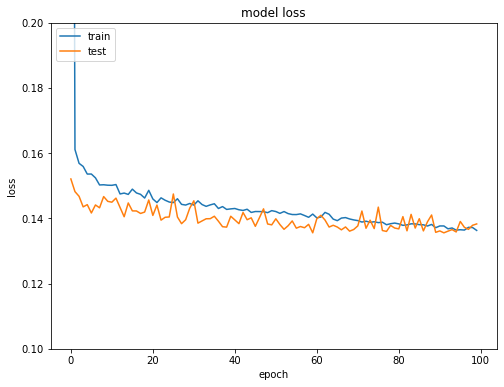

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.1, 0.2])
plt.show()